In [8]:
"""
Default inputs that will be overriden in Flyte execution
"""
y_true = [0,1,1,1,0,0,0,0,1]
y_pred = [0,1,1,0,1,0,0,0,1]
title = "Test title"
normalize = True
classes = ["A", "B"]

In [5]:
from __future__ import absolute_import

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as _cm
from sklearn.utils.multiclass import unique_labels


def _plot_confusion_matrix(y_true, y_pred, classes, to_file_path=None, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix to a file, if given or shows. It also returns the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = _cm(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    if to_file_path is None:
        plt.show()
    else:
        plt.savefig(to_file_path)
    return cm


Normalized confusion matrix


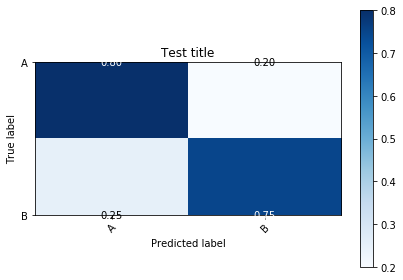

In [6]:
visual = "/tmp/visual.png"
cm = _plot_confusion_matrix(np.asarray(y_true), np.asarray(y_pred), classes=np.asarray(classes), title=title, normalize=normalize, to_file_path=visual)
matrix = []
for i in range(cm.shape[0]):
    matrix.append([])
    for j in range(cm.shape[1]):
        matrix[i].append(j)